# Classificação de ligas e resultados por eventos em jogos de futebol

- Gustavo Magalhães - FEUP - Porto, Portugal - up201705072@fe.up.pt
- Nuno Cardoso - FEUP - Porto, Portugal - up201706162@fe.up.pt
- Tiago Silva - FEUP - Porto, Portugal - up201705985@fe.up.pt

**O futebol, o jogo mais popular do planeta, disputa-se por 2 equipas de 11 elementos num campo retangular com duas balizas em cada lado,  onde ganha equipa a marcar mais, pontos, movendo uma bola até a baliza adversária. É naturalmente um disporto técnico e fisico, recompensado por norma a equipa em melhor forma, não deixando de parte o fator sorte. Como estas partidas se disputam no decorrer de 90 minutos divididos em duas partes de 45 minutos, vários eventos são gerados nesse tempo, sendo estes remates, faltas, golos entre outros que acreditamos serem essenciais quando se dita o resultado final e o próprio estilo de jogo tático adotado. É com base nesta informação que iremos tentar classificar os paises em que estas partidas se disputam, e até mesmo prever o resultado final.**

## I. Introdução 

O documento apresentado, no âmbito da unidade curricular de Inteligência Artificial, tem como objetivo a exploração de uma base de dados com vários eventos decorridos em jogos de futebol nas principais ligas europeias, usando para isso aprendizagem supervisionada por classificação. São objetivos deste trabalho, tanto a avaliação da base de dados para escolha de classes e geração do dataset, como também a aplicacçao de algoritmos a aplicar neste tipo de problemas e a sua análise. 

No presento trabalho a decisão tomada passou por organizar datasets contando as repetições de eventos distintos ocorrentes num jogo de futebol, para assim classificar qual o país onde o jogo está a ser disputado, ou o resultado final. Quanto aos algortimos, àrvores de decisão, redes neuronais artificiais e k-vizinho mais próximo foram os escolhidos.

## II. Descrição do Problema

Dado a base de dados analisade possuir bastante colunas e por cada jogo gerar em média 100 eventos, decidimos desde já nos nossos datasets agrupar todos os eventos de um jogo numa linha apenas, para isso contando o numero de ocorrências de cada tipo de evento registando. 

Dado alguma indecisão, gerada pela dificuldade em saber quais as melhores classes a usar, dividimos o tema em 2 classificações possiveis, classificar países e classificar resultados. Para que isso fosse possivel, percorrendo a nossa base de dados com um programa por nós implementado [1], geramos então os seguintes datasets:

- Para se classificar o país onde ocorre o jogo, agrupamos os eventos de cada jogo contando o número de ocorrências de golos, faltas, cartões, penáltis, cantos, contra-ataques e número de vezes em que se rematou a bola numa dada zona do campo;

- Para se classificar o vencedor do jogo ou empate, agrupamos os eventos de cada jogo contando número de faltas, cartões, penáltis, cantos, contra-ataques e número de remates de uma dada zona do campo, isto tanto para a equipa da casa como a visitante, com a particularidade de se ignorarem os golos mar.
 

### IART - Proj2

- gameEvents.csv

	- fast break, attempt_1, attempt_2, attempt_4, attempt_5 - todos os valores estão a 0, estando o pandas a contabilizar alguns 0 como valores nulos, as contagens nao estavam iguais as dos id’s.
	- country - o pandas nao da input a coluna, muito provavelmente pq ha jogos com países omissos, dando input 0, isto sendo a classes tem de ter os valores todos definidos. 

- gameEventsHomeAway.csv

	- home_fastbreak, home_attempt_1, home_attempt_2, home_attempt_4, home_attempt_5, away_fastbreak, away_attempt_1, away_attempt_2, away_attempt_4, away_attempt_5 - semelhante ao ponto acima, esta tudo a 0; 
	- winner preciso verificar se os 0 estão corretos e nao sao toleres omissos

**Nota** considerar uso de ’NA’ caso valores nao sejam encontrados a percorrer os ficheiros, considerar também que se estes attempts nos dados reais serem sempre 0 a coluna pode simplesmente ser removida. 


In [6]:
#imports used 
import pandas as pd

# This line tells the notebook to show plots inside of the notebook
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

### Classificação por país 

In [8]:
#read csv file for country classification considering possible na values
country_data = pd.read_csv('gameEvents.csv', na_values=['NA'])
country_data.describe()

goal         foul       corner      offside  yellow_card  \
count  9073.000000  9073.000000  9073.000000  9073.000000  9073.000000   
mean      2.694258    25.668798    10.051251     4.790918     4.409457   
std       1.681543     6.396077     3.408821     2.596853     2.267054   
min       0.000000     3.000000     1.000000     0.000000     0.000000   
25%       1.000000    21.000000     8.000000     3.000000     3.000000   
50%       3.000000    25.000000    10.000000     4.000000     4.000000   
75%       4.000000    30.000000    12.000000     6.000000     6.000000   
max      12.000000    51.000000    26.000000    21.000000    15.000000   

          red_card      penalty    fastbreak  attempt_1  attempt_2  \
count  9073.000000  9073.000000  9073.000000     9073.0     9073.0   
mean      0.137992     0.298027     0.505676        0.0        0.0   
std       0.390760     0.622206     0.782156        0.0        0.0   
min       0.000000     0.000000     0.000000        0.0        0.0   
25%       0.000000     0.000000     0.000000        0.0        0.0   
50%       0.000000     0.000000     0.000000        0.0        0.0   
75%       0.000000     0.000000     1.000000        0.0        0.0   
max       4.000000     5.000000     5.000000        0.0        0.0   

          ...        attempt_10   attempt_11   attempt_12   attempt_13  \
count     ...       9073.000000  9073.000000  9073.000000  9073.000000   
mean      ...          0.384768     2.032514     0.377604     0.734046   
std       ...          0.636190     1.477991     0.619204     0.908711   
min       ...          0.000000     0.000000     0.000000     0.000000   
25%       ...          0.000000     1.000000     0.000000     0.000000   
50%       ...          0.000000     2.000000     0.000000     1.000000   
75%       ...          1.000000     3.000000     1.000000     1.000000   
max       ...          5.000000    10.000000     4.000000     6.000000   

        attempt_14   attempt_15   attempt_16   attempt_17   attempt_18  \
count  9073.000000  9073.000000  9073.000000  9073.000000  9073.000000   
mean      0.286013    10.322165     0.219442     0.218009     0.028216   
std       0.540347     3.679051     0.487508     0.495880     0.170840   
min       0.000000     1.000000     0.000000     0.000000     0.000000   
25%       0.000000     8.000000     0.000000     0.000000     0.000000   
50%       0.000000    10.000000     0.000000     0.000000     0.000000   
75%       0.000000    13.000000     0.000000     0.000000     0.000000   
max       4.000000    28.000000     4.000000     6.000000     2.000000   

        attempt_19  
count  9073.000000  
mean      0.159815  
std       0.407474  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       9.000000  

[8 rows x 27 columns]

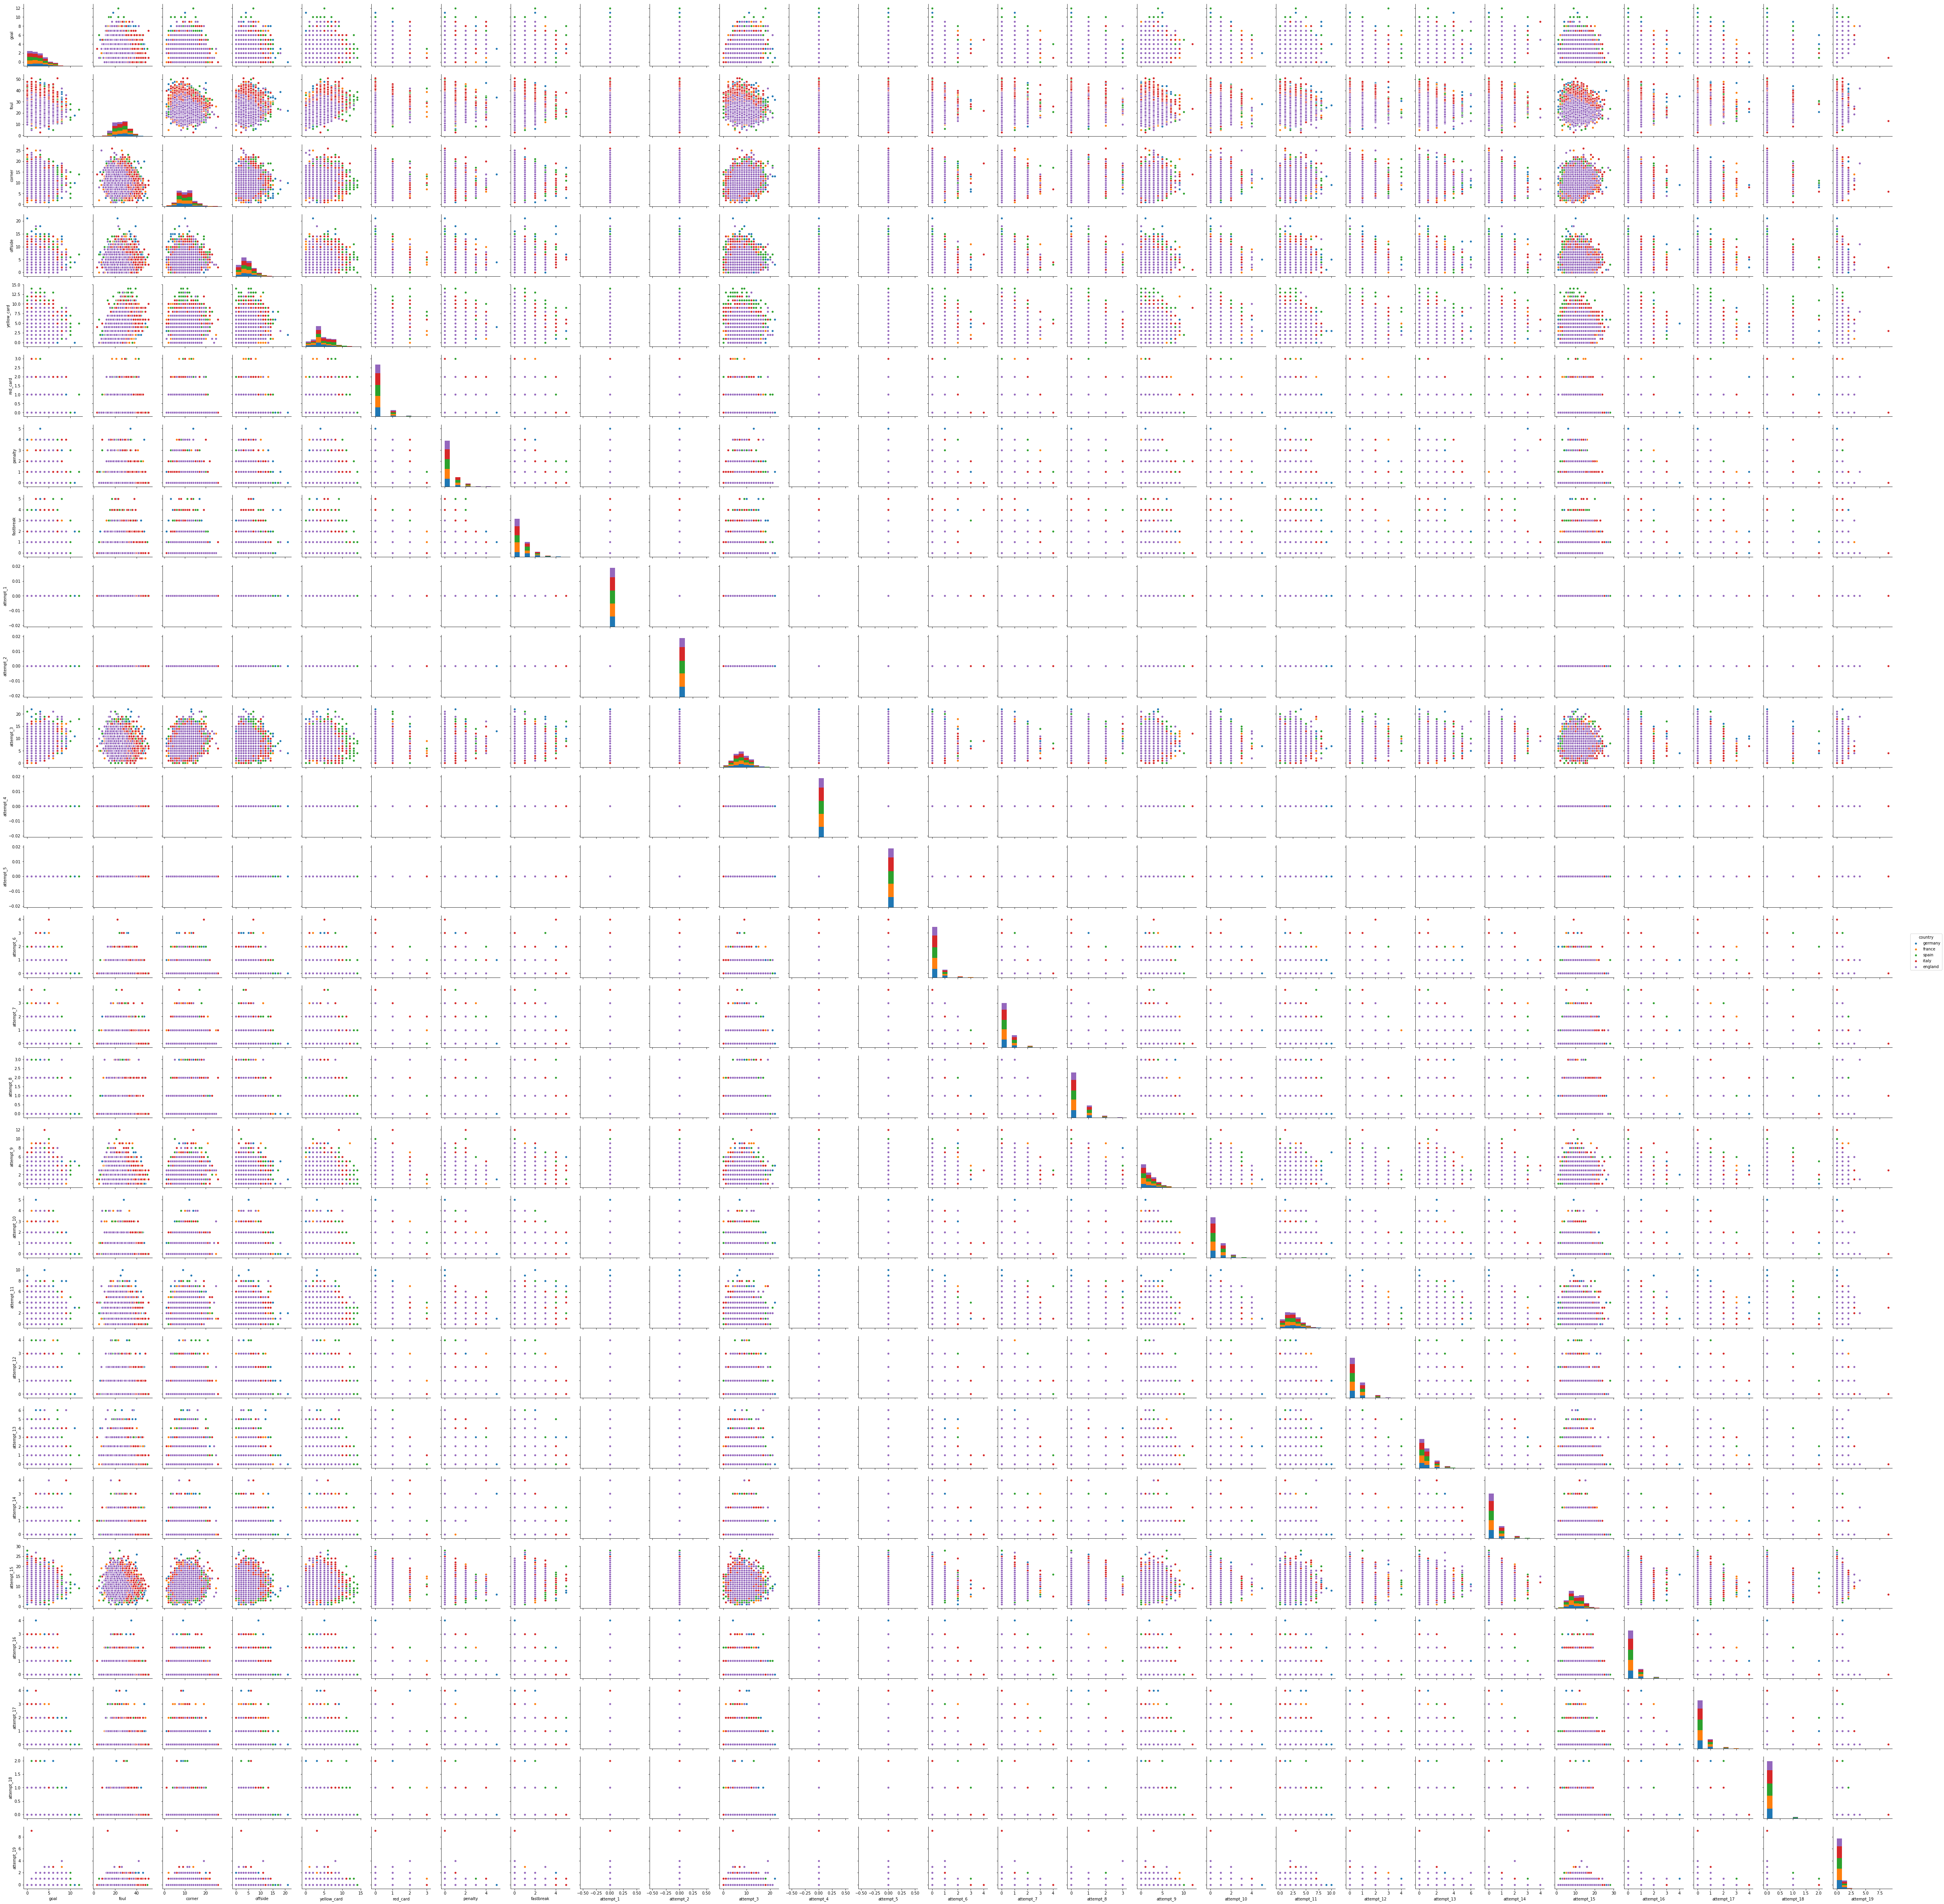

In [3]:
#plotting 
sb.pairplot(country_data.dropna(), hue='country')

In [9]:
country_data = country_data.drop(['attempt_1', 'attempt_2', 'attempt_4', 'attempt_5'], axis=1)
country_data = country_data.dropna()
country_data.describe()

goal         foul       corner      offside  yellow_card  \
count  8035.000000  8035.000000  8035.000000  8035.000000  8035.000000   
mean      2.696453    25.534412    10.033230     4.745364     4.402489   
std       1.689438     6.383882     3.408028     2.584374     2.253433   
min       0.000000     3.000000     1.000000     0.000000     0.000000   
25%       1.000000    21.000000     8.000000     3.000000     3.000000   
50%       3.000000    25.000000    10.000000     4.000000     4.000000   
75%       4.000000    30.000000    12.000000     6.000000     6.000000   
max      12.000000    51.000000    26.000000    21.000000    14.000000   

          red_card      penalty    fastbreak    attempt_3    attempt_6  \
count  8035.000000  8035.000000  8035.000000  8035.000000  8035.000000   
mean      0.135283     0.297449     0.491350     7.704045     0.163783   
std       0.384856     0.626076     0.769902     3.060754     0.416019   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     6.000000     0.000000   
50%       0.000000     0.000000     0.000000     7.000000     0.000000   
75%       0.000000     0.000000     1.000000    10.000000     0.000000   
max       3.000000     5.000000     5.000000    22.000000     4.000000   

          ...        attempt_10   attempt_11   attempt_12   attempt_13  \
count     ...       8035.000000  8035.000000  8035.000000  8035.000000   
mean      ...          0.383696     2.038706     0.383074     0.741008   
std       ...          0.635642     1.476939     0.621667     0.912533   
min       ...          0.000000     0.000000     0.000000     0.000000   
25%       ...          0.000000     1.000000     0.000000     0.000000   
50%       ...          0.000000     2.000000     0.000000     1.000000   
75%       ...          1.000000     3.000000     1.000000     1.000000   
max       ...          5.000000    10.000000     4.000000     6.000000   

        attempt_14   attempt_15   attempt_16   attempt_17   attempt_18  \
count  8035.000000  8035.000000  8035.000000  8035.000000  8035.000000   
mean      0.286497    10.276540     0.213566     0.213566     0.027878   
std       0.542274     3.670244     0.479285     0.485734     0.168371   
min       0.000000     1.000000     0.000000     0.000000     0.000000   
25%       0.000000     8.000000     0.000000     0.000000     0.000000   
50%       0.000000    10.000000     0.000000     0.000000     0.000000   
75%       0.000000    13.000000     0.000000     0.000000     0.000000   
max       4.000000    28.000000     4.000000     4.000000     2.000000   

        attempt_19  
count  8035.000000  
mean      0.164032  
std       0.414422  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       9.000000  

[8 rows x 23 columns]

# TODO: Inserir justificação

#### Dados limpos

In [10]:
country_data.to_csv('gameEvents_clean.csv', index=False)

In [11]:
#read csv file for country classification
country_data_clean = pd.read_csv('gameEvents_clean.csv')
country_data_clean.describe()

goal         foul       corner      offside  yellow_card  \
count  8035.000000  8035.000000  8035.000000  8035.000000  8035.000000   
mean      2.696453    25.534412    10.033230     4.745364     4.402489   
std       1.689438     6.383882     3.408028     2.584374     2.253433   
min       0.000000     3.000000     1.000000     0.000000     0.000000   
25%       1.000000    21.000000     8.000000     3.000000     3.000000   
50%       3.000000    25.000000    10.000000     4.000000     4.000000   
75%       4.000000    30.000000    12.000000     6.000000     6.000000   
max      12.000000    51.000000    26.000000    21.000000    14.000000   

          red_card      penalty    fastbreak    attempt_3    attempt_6  \
count  8035.000000  8035.000000  8035.000000  8035.000000  8035.000000   
mean      0.135283     0.297449     0.491350     7.704045     0.163783   
std       0.384856     0.626076     0.769902     3.060754     0.416019   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     6.000000     0.000000   
50%       0.000000     0.000000     0.000000     7.000000     0.000000   
75%       0.000000     0.000000     1.000000    10.000000     0.000000   
max       3.000000     5.000000     5.000000    22.000000     4.000000   

          ...        attempt_10   attempt_11   attempt_12   attempt_13  \
count     ...       8035.000000  8035.000000  8035.000000  8035.000000   
mean      ...          0.383696     2.038706     0.383074     0.741008   
std       ...          0.635642     1.476939     0.621667     0.912533   
min       ...          0.000000     0.000000     0.000000     0.000000   
25%       ...          0.000000     1.000000     0.000000     0.000000   
50%       ...          0.000000     2.000000     0.000000     1.000000   
75%       ...          1.000000     3.000000     1.000000     1.000000   
max       ...          5.000000    10.000000     4.000000     6.000000   

        attempt_14   attempt_15   attempt_16   attempt_17   attempt_18  \
count  8035.000000  8035.000000  8035.000000  8035.000000  8035.000000   
mean      0.286497    10.276540     0.213566     0.213566     0.027878   
std       0.542274     3.670244     0.479285     0.485734     0.168371   
min       0.000000     1.000000     0.000000     0.000000     0.000000   
25%       0.000000     8.000000     0.000000     0.000000     0.000000   
50%       0.000000    10.000000     0.000000     0.000000     0.000000   
75%       0.000000    13.000000     0.000000     0.000000     0.000000   
max       4.000000    28.000000     4.000000     4.000000     2.000000   

        attempt_19  
count  8035.000000  
mean      0.164032  
std       0.414422  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       9.000000  

[8 rows x 23 columns]

In [ ]:
#plotting 
sb.pairplot(country_data_clean, hue='country')

### Classificação por vencedor 

In [16]:
#read csv file for country classification considering possible na values
winner_data = pd.read_csv('gameEvents[HomeAway].csv', na_values=['NA'])
winner_data.describe()

home_foul  home_corner  home_offside  home_yellow_card  \
count  9073.000000  9073.000000   9073.000000       9073.000000   
mean     12.684007     5.650942      2.514494          2.035380   
std       4.128249     2.921888      1.917625          1.410688   
min       0.000000     0.000000      0.000000          0.000000   
25%      10.000000     4.000000      1.000000          1.000000   
50%      12.000000     5.000000      2.000000          2.000000   
75%      15.000000     7.000000      4.000000          3.000000   
max      29.000000    21.000000     14.000000          9.000000   

       home_red_card  home_penalty  home_fastbreak  home_attempt_1  \
count    9073.000000   9073.000000     9073.000000          9073.0   
mean        0.060399      0.175025        0.267828             0.0   
std         0.249978      0.425704        0.574017             0.0   
min         0.000000      0.000000        0.000000             0.0   
25%         0.000000      0.000000        0.000000             0.0   
50%         0.000000      0.000000        0.000000             0.0   
75%         0.000000      0.000000        0.000000             0.0   
max         3.000000      3.000000        4.000000             0.0   

       home_attempt_2  home_attempt_3     ...       away_attempt_11  \
count          9073.0     9073.000000     ...           9073.000000   
mean              0.0        4.364929     ...              0.916676   
std               0.0        2.507192     ...              1.001047   
min               0.0        0.000000     ...              0.000000   
25%               0.0        3.000000     ...              0.000000   
50%               0.0        4.000000     ...              1.000000   
75%               0.0        6.000000     ...              1.000000   
max               0.0       19.000000     ...              7.000000   

       away_attempt_12  away_attempt_13  away_attempt_14  away_attempt_15  \
count      9073.000000       9073.00000      9073.000000      9073.000000   
mean          0.162019          0.29968         0.115948         4.714758   
std           0.406602          0.58212         0.337935         2.642412   
min           0.000000          0.00000         0.000000         0.000000   
25%           0.000000          0.00000         0.000000         3.000000   
50%           0.000000          0.00000         0.000000         4.000000   
75%           0.000000          0.00000         0.000000         6.000000   
max           3.000000          5.00000         3.000000        18.000000   

       away_attempt_16  away_attempt_17  away_attempt_18  away_attempt_19  \
count      9073.000000      9073.000000      9073.000000      9073.000000   
mean          0.106249         0.112421         0.015651         0.068665   
std           0.338188         0.346838         0.126763         0.267307   
min           0.000000         0.000000         0.000000         0.000000   
25%           0.000000         0.000000         0.000000         0.000000   
50%           0.000000         0.000000         0.000000         0.000000   
75%           0.000000         0.000000         0.000000         0.000000   
max           3.000000         6.000000         2.000000         6.000000   

            winner  
count  9073.000000  
mean      1.029428  
std       0.733215  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       2.000000  
max       2.000000  

[8 rows x 53 columns]

In [5]:
#plotting
sb.pairplot(winner_data.dropna(),hue='winner')

In [24]:
winner_data = winner_data.drop(['home_attempt_1', 'home_attempt_2', 'home_attempt_4', 'home_attempt_5'], axis=1)
winner_data = winner_data.drop(['away_attempt_1', 'away_attempt_2', 'away_attempt_4', 'away_attempt_5'], axis=1)
winner_data = winner_data.dropna()
winner_data.describe()

home_foul  home_corner  home_offside  home_yellow_card  \
count  9073.000000  9073.000000   9073.000000       9073.000000   
mean     12.684007     5.650942      2.514494          2.035380   
std       4.128249     2.921888      1.917625          1.410688   
min       0.000000     0.000000      0.000000          0.000000   
25%      10.000000     4.000000      1.000000          1.000000   
50%      12.000000     5.000000      2.000000          2.000000   
75%      15.000000     7.000000      4.000000          3.000000   
max      29.000000    21.000000     14.000000          9.000000   

       home_red_card  home_penalty  home_fastbreak  home_attempt_1  \
count    9073.000000   9073.000000     9073.000000          9073.0   
mean        0.060399      0.175025        0.267828             0.0   
std         0.249978      0.425704        0.574017             0.0   
min         0.000000      0.000000        0.000000             0.0   
25%         0.000000      0.000000        0.000000             0.0   
50%         0.000000      0.000000        0.000000             0.0   
75%         0.000000      0.000000        0.000000             0.0   
max         3.000000      3.000000        4.000000             0.0   

       home_attempt_2  home_attempt_3     ...       away_attempt_11  \
count          9073.0     9073.000000     ...           9073.000000   
mean              0.0        4.364929     ...              0.916676   
std               0.0        2.507192     ...              1.001047   
min               0.0        0.000000     ...              0.000000   
25%               0.0        3.000000     ...              0.000000   
50%               0.0        4.000000     ...              1.000000   
75%               0.0        6.000000     ...              1.000000   
max               0.0       19.000000     ...              7.000000   

       away_attempt_12  away_attempt_13  away_attempt_14  away_attempt_15  \
count      9073.000000       9073.00000      9073.000000      9073.000000   
mean          0.162019          0.29968         0.115948         4.714758   
std           0.406602          0.58212         0.337935         2.642412   
min           0.000000          0.00000         0.000000         0.000000   
25%           0.000000          0.00000         0.000000         3.000000   
50%           0.000000          0.00000         0.000000         4.000000   
75%           0.000000          0.00000         0.000000         6.000000   
max           3.000000          5.00000         3.000000        18.000000   

       away_attempt_16  away_attempt_17  away_attempt_18  away_attempt_19  \
count      9073.000000      9073.000000      9073.000000      9073.000000   
mean          0.106249         0.112421         0.015651         0.068665   
std           0.338188         0.346838         0.126763         0.267307   
min           0.000000         0.000000         0.000000         0.000000   
25%           0.000000         0.000000         0.000000         0.000000   
50%           0.000000         0.000000         0.000000         0.000000   
75%           0.000000         0.000000         0.000000         0.000000   
max           3.000000         6.000000         2.000000         6.000000   

            winner  
count  9073.000000  
mean      1.029428  
std       0.733215  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       2.000000  
max       2.000000  

[8 rows x 53 columns]

# TODO: Inserir justificação

#### Dados limpos

In [28]:
winner_data.to_csv('gameEvents[HomeAway]_clean.csv', index=False)

In [3]:
#read csv file for country classification
winner_data_clean = pd.read_csv('gameEvents[HomeAway]_clean.csv')
winner_data_clean.describe()

home_foul  home_corner  home_offside  home_yellow_card  \
count  9073.000000  9073.000000   9073.000000       9073.000000   
mean     12.684007     5.650942      2.514494          2.035380   
std       4.128249     2.921888      1.917625          1.410688   
min       0.000000     0.000000      0.000000          0.000000   
25%      10.000000     4.000000      1.000000          1.000000   
50%      12.000000     5.000000      2.000000          2.000000   
75%      15.000000     7.000000      4.000000          3.000000   
max      29.000000    21.000000     14.000000          9.000000   

       home_red_card  home_penalty  home_fastbreak  home_attempt_1  \
count    9073.000000   9073.000000     9073.000000          9073.0   
mean        0.060399      0.175025        0.267828             0.0   
std         0.249978      0.425704        0.574017             0.0   
min         0.000000      0.000000        0.000000             0.0   
25%         0.000000      0.000000        0.000000             0.0   
50%         0.000000      0.000000        0.000000             0.0   
75%         0.000000      0.000000        0.000000             0.0   
max         3.000000      3.000000        4.000000             0.0   

       home_attempt_2  home_attempt_3     ...       away_attempt_11  \
count          9073.0     9073.000000     ...           9073.000000   
mean              0.0        4.364929     ...              0.916676   
std               0.0        2.507192     ...              1.001047   
min               0.0        0.000000     ...              0.000000   
25%               0.0        3.000000     ...              0.000000   
50%               0.0        4.000000     ...              1.000000   
75%               0.0        6.000000     ...              1.000000   
max               0.0       19.000000     ...              7.000000   

       away_attempt_12  away_attempt_13  away_attempt_14  away_attempt_15  \
count      9073.000000       9073.00000      9073.000000      9073.000000   
mean          0.162019          0.29968         0.115948         4.714758   
std           0.406602          0.58212         0.337935         2.642412   
min           0.000000          0.00000         0.000000         0.000000   
25%           0.000000          0.00000         0.000000         3.000000   
50%           0.000000          0.00000         0.000000         4.000000   
75%           0.000000          0.00000         0.000000         6.000000   
max           3.000000          5.00000         3.000000        18.000000   

       away_attempt_16  away_attempt_17  away_attempt_18  away_attempt_19  \
count      9073.000000      9073.000000      9073.000000      9073.000000   
mean          0.106249         0.112421         0.015651         0.068665   
std           0.338188         0.346838         0.126763         0.267307   
min           0.000000         0.000000         0.000000         0.000000   
25%           0.000000         0.000000         0.000000         0.000000   
50%           0.000000         0.000000         0.000000         0.000000   
75%           0.000000         0.000000         0.000000         0.000000   
max           3.000000         6.000000         2.000000         6.000000   

            winner  
count  9073.000000  
mean      1.029428  
std       0.733215  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       2.000000  
max       2.000000  

[8 rows x 53 columns]

In [ ]:
#plotting 
sb.pairplot(winner_data_clean, hue='winner')

## III. Abordagem

Section

### Classificação por país

### 1. Árvore de Decisão

In [26]:
# Extract the data in this format from pandas like this:
all_inputs = country_data_clean[['goal','foul','corner','offside','yellow_card','red_card','penalty','fastbreak','attempt_3','attempt_6','attempt_7','attempt_8','attempt_9','attempt_10','attempt_11','attempt_12','attempt_13','attempt_14','attempt_15','attempt_16','attempt_17','attempt_18','attempt_19']].values

# Extract the class labels
all_labels = country_data_clean['country'].values

# Subset of our inputs looks like:
all_inputs[:5]

array([[ 4, 29, 14,  4,  4,  0,  0,  1,  7,  0,  0,  0,  5,  0,  2,  0,
         1,  0,  7,  1,  1,  0,  0],
       [ 4, 40,  9,  1,  6,  0,  0,  2,  6,  0,  1,  1,  1,  0,  1,  0,
         1,  0,  9,  0,  0,  0,  0],
       [ 2, 37, 11, 12,  3,  0,  0,  2,  5,  0,  0,  0,  3,  0,  1,  1,
         6,  0, 11,  1,  0,  0,  0],
       [ 1, 28, 13, 11,  4,  0,  0,  0,  4,  0,  0,  0,  1,  2,  0,  0,
         0,  0, 14,  0,  0,  0,  0],
       [ 1, 20, 14,  3,  3,  0,  0,  0,  5,  0,  1,  0,  1,  0,  2,  2,
         1,  0, 11,  0,  0,  0,  0]])

In [27]:
from sklearn.model_selection import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)

In [28]:
from sklearn.tree import DecisionTreeClassifier

# Create the classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the classifier on the training set
decision_tree_classifier.fit(training_inputs, training_classes)

# Validate the classifier on the testing set using classification accuracy
decision_tree_classifier.score(testing_inputs, testing_classes)

0.31110004977600797

In [16]:
import sklearn.tree as tree
from sklearn.externals.six import StringIO

with open('country_dtc.dot', 'w') as out_file:
    out_file = tree.export_graphviz(decision_tree_classifier, out_file=out_file)

/home/nmtc01/.local/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


''

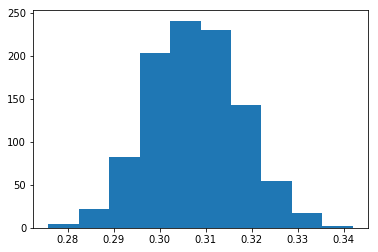

In [35]:
model_accuracies = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)

    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)

plt.hist(model_accuracies)
;

''

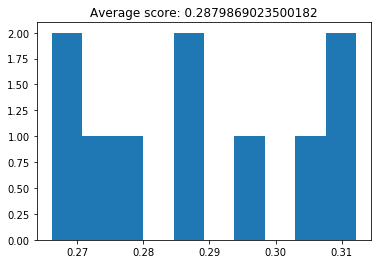

In [37]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=1)

cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))
;

### 2. K Vizinho mais Próximo

### 3. Rede Neuronal

### Classificação por vencedor

### 1. Árvore de Decisão

In [30]:
# Extract the data in this format from pandas like this:
all_inputs2 = winner_data_clean[['home_foul','home_corner','home_offside','home_yellow_card','home_red_card','home_penalty','home_fastbreak','home_attempt_1','home_attempt_2','home_attempt_3','home_attempt_4','home_attempt_5','home_attempt_6','home_attempt_7','home_attempt_8','home_attempt_9','home_attempt_10','home_attempt_11','home_attempt_12','home_attempt_13','home_attempt_14','home_attempt_15','home_attempt_16','home_attempt_17','home_attempt_18','home_attempt_19','away_foul','away_corner','away_offside','away_yellow_card','away_red_card','away_penalty','away_fastbreak','away_attempt_1','away_attempt_2','away_attempt_3','away_attempt_4','away_attempt_5','away_attempt_6','away_attempt_7','away_attempt_8','away_attempt_9','away_attempt_10','away_attempt_11','away_attempt_12','away_attempt_13','away_attempt_14','away_attempt_15','away_attempt_16','away_attempt_17','away_attempt_18','away_attempt_19']].values

# Extract the class labels
all_labels2 = winner_data_clean['winner'].values

# Subset of our inputs looks like:
all_inputs2[:5]

array([[12,  7,  1,  1,  0,  0,  1,  0,  0,  4,  0,  0,  0,  0,  0,  3,
         0,  2,  0,  1,  0,  5,  0,  1,  0,  0, 17,  7,  3,  3,  0,  0,
         0,  0,  0,  3,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  2,
         1,  0,  0,  0],
       [15,  5,  1,  2,  0,  0,  0,  0,  0,  5,  0,  0,  0,  0,  0,  1,
         0,  0,  0,  1,  0,  4,  0,  0,  0,  0, 25,  4,  0,  4,  0,  0,
         2,  0,  0,  1,  0,  0,  0,  1,  1,  0,  0,  1,  0,  0,  0,  5,
         0,  0,  0,  0],
       [12,  6,  6,  1,  0,  0,  2,  0,  0,  3,  0,  0,  0,  0,  0,  2,
         0,  1,  1,  5,  0,  6,  1,  0,  0,  0, 25,  5,  6,  2,  0,  0,
         0,  0,  0,  2,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  5,
         0,  0,  0,  0],
       [20,  7,  5,  1,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  1,
         0,  0,  0,  0,  0,  9,  0,  0,  0,  0,  8,  6,  6,  3,  0,  0,
         0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  5,
         0,  0,  0,  0],
       [10,  3,  2,  2,  0,  0,  0, 

In [31]:
from sklearn.model_selection import train_test_split

(training_inputs2,
 testing_inputs2,
 training_classes2,
 testing_classes2) = train_test_split(all_inputs2, all_labels2, test_size=0.25, random_state=1)

In [32]:
from sklearn.tree import DecisionTreeClassifier

# Create the classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the classifier on the training set
decision_tree_classifier.fit(training_inputs2, training_classes2)

# Validate the classifier on the testing set using classification accuracy
decision_tree_classifier.score(testing_inputs2, testing_classes2)

0.4420449537241075

In [25]:
import sklearn.tree as tree
from sklearn.externals.six import StringIO

with open('winner_dtc.dot', 'w') as out_file:
    out_file = tree.export_graphviz(decision_tree_classifier, out_file=out_file)

''

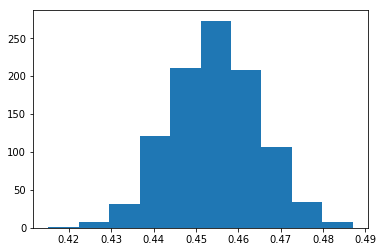

In [33]:
model_accuracies = []

for repetition in range(1000):
    (training_inputs2,
     testing_inputs2,
     training_classes2,
     testing_classes2) = train_test_split(all_inputs2, all_labels2, test_size=0.25)

    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs2, training_classes2)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs2, testing_classes2)
    model_accuracies.append(classifier_accuracy)

plt.hist(model_accuracies)
;

''

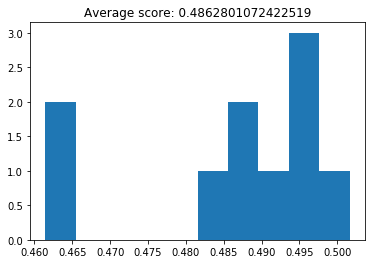

In [38]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=1)

cv_scores = cross_val_score(decision_tree_classifier, all_inputs2, all_labels2, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))
;

### 2. K Vizinho mais Próximo

### 3. Rede Neuronal

### IV. Avaliação Experimental 

Deve incluir graficos e tabelas com resultados 

### V. Conclusões

TODO

**REFERÊNCIAS**

- [1] BLAH
- ...